In [19]:
import os
os.chdir('../../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', font_scale=2.0, style='whitegrid')

### Trading Hub Europe

In [20]:
the_consumption = pd.read_csv(
    'data/raw/Trading Hub Europe  Publications  Transparency  Aggregated consumption data.csv',
    sep=';',
    thousands=',',
    index_col='Gasday'
    )

the_consumption.index = pd.to_datetime(the_consumption.index, format='%d/%m/%Y')

# Convert kWh to MWh and aggregate different measurement types
the_consumption = the_consumption.select_dtypes('number') / 1000
the_consumption_aggregated = the_consumption.sum(axis='columns')

the_consumption_aggregated.sample(n=5).sort_index()

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/Trading Hub Europe  Publications  Transparency  Aggregated consumption data.csv'

### GASPOOL market area

In [ ]:
gaspool_consumption = pd.read_csv(
    'data/raw/GASPOOL natural gas consumption.csv',
    sep=';',
    index_col='Datum'
)

gaspool_consumption.index = pd.to_datetime(gaspool_consumption.index, format='%d.%m.%Y')
gaspool_consumption_aggregated = gaspool_consumption.sum(axis='columns')

gaspool_consumption_aggregated.sample(n=5).sort_index()

Datum
2017-04-02     882351
2020-02-09    1439548
2020-05-18     950396
2020-09-13     769207
2020-11-04    1408948
dtype: int64

### NetConnect Germany market area

In [ ]:
ncg_consumption = pd.read_csv(
    'data/raw/NetConnect Germany natural gas consumption.csv',
    sep=';',
    index_col='DayOfUse'
)

ncg_consumption.index = pd.to_datetime(ncg_consumption.index, format='%d.%m.%Y')

# Convert kWh to MWh and aggregate different measurement types
ncg_consumption = ncg_consumption.select_dtypes('number') / 1000
ncg_consumption_aggregated = ncg_consumption.sum(axis='columns')

ncg_consumption_aggregated.sample(n=5).sort_index()

DayOfUse
2017-12-04    2442360.633
2020-03-22    1748181.704
2020-08-05     816043.537
2021-04-20    1644272.934
2021-05-03    1542963.808
dtype: float64

In [ ]:
# Sum former market areas
gaspool_ncg_combined = gaspool_consumption_aggregated + ncg_consumption_aggregated
gaspool_ncg_combined.sample(n=5).sort_index()

2013-11-10            NaN
2015-03-10            NaN
2019-01-20    4718318.343
2019-03-21    3239653.641
2019-04-17    2630270.107
dtype: float64

In [ ]:
consumption_data = pd.concat([the_consumption_aggregated, gaspool_ncg_combined])

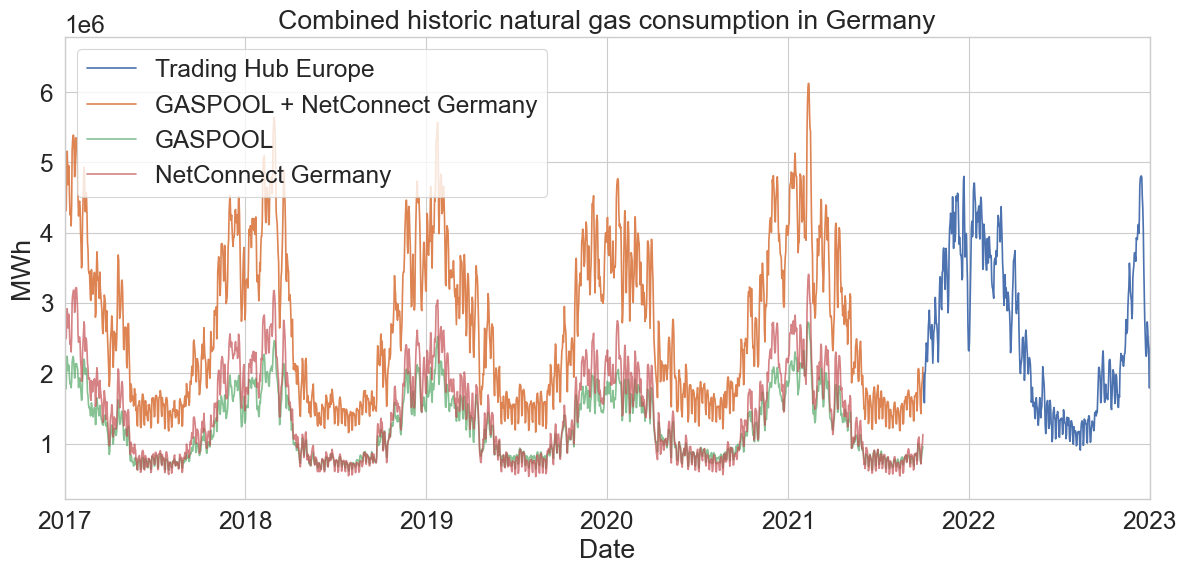

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
the_consumption_aggregated.plot(ax=ax, label="Trading Hub Europe")
gaspool_ncg_combined.plot(ax=ax, label="GASPOOL + NetConnect Germany")
gaspool_consumption_aggregated.plot(ax=ax, label="GASPOOL", alpha=0.7)
ncg_consumption_aggregated.plot(ax=ax, label="NetConnect Germany", alpha=0.7)
ax.set_xlim("2017-01-01", "2023-01-01")
ax.set_title("Combined historic natural gas consumption in Germany")
ax.set_ylabel("MWh")
ax.set_xlabel("Date")

# Legend left
ax.legend(loc='upper left')

# Save plot
fig.savefig("diagrams/data_overview_007_002.svg", format="svg", bbox_inches="tight")

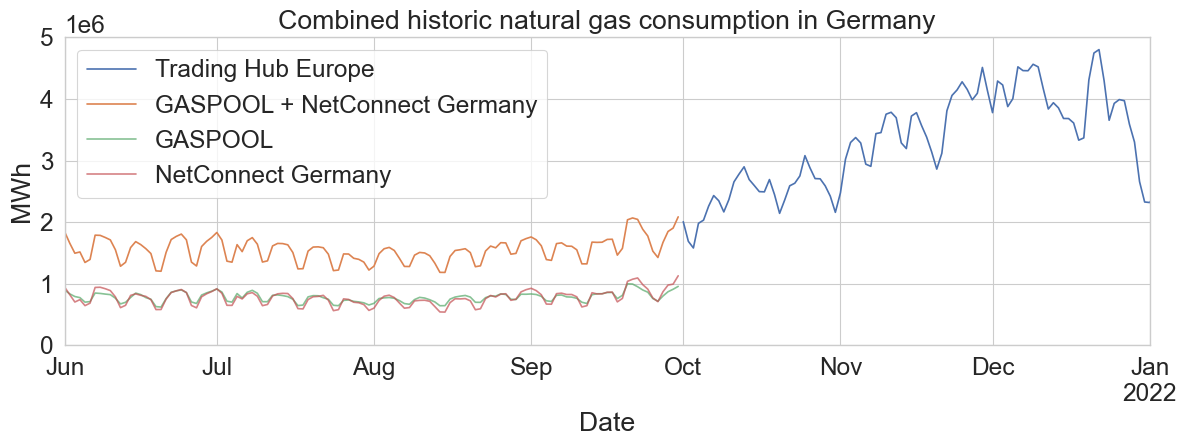

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))
the_consumption_aggregated.plot(ax=ax, label="Trading Hub Europe")
gaspool_ncg_combined.plot(ax=ax, label="GASPOOL + NetConnect Germany")
gaspool_consumption_aggregated.plot(ax=ax, label="GASPOOL", alpha=0.7)
ncg_consumption_aggregated.plot(ax=ax, label="NetConnect Germany", alpha=0.7)
ax.set_xlim("2021-06-01", "2022-01-01")
ax.set_ylim(0, 5000000)
ax.set_title("Combined historic natural gas consumption in Germany")
ax.set_ylabel("MWh")
ax.set_xlabel("Date")
ax.legend()

# Save plot
fig.savefig("diagrams/data_overview_007_003.svg", format="svg", bbox_inches="tight")

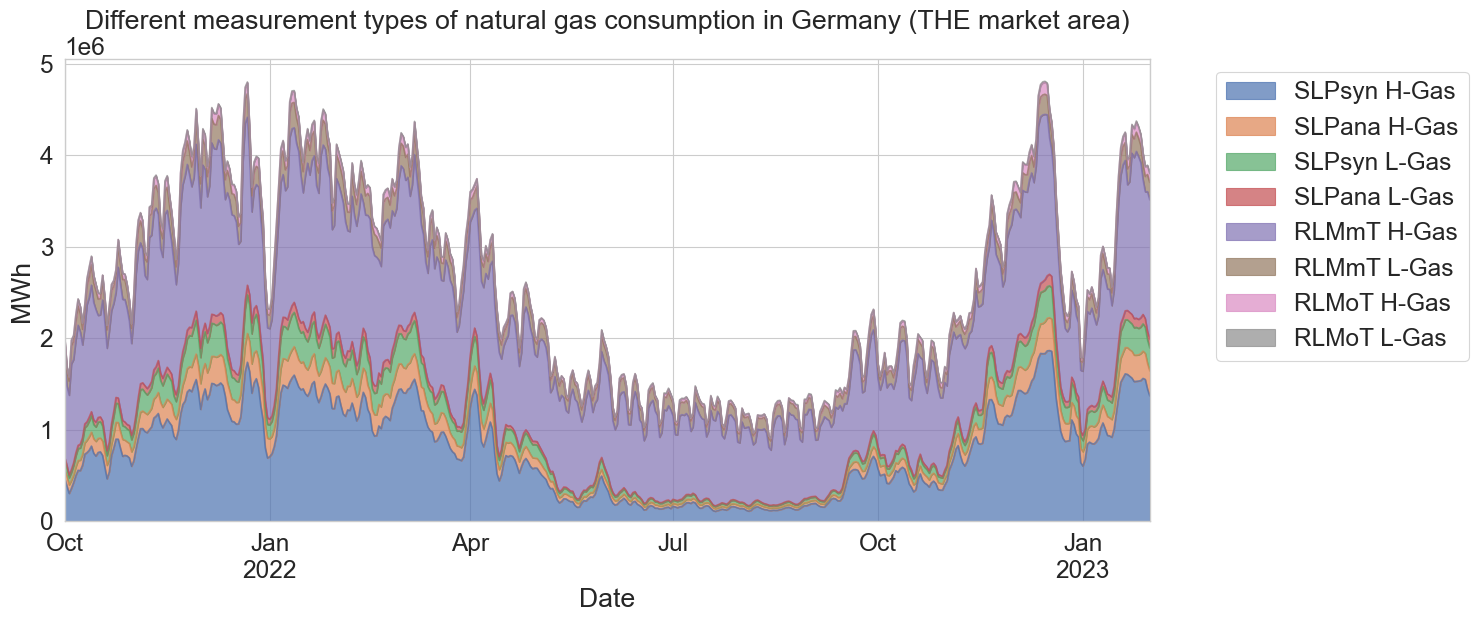

In [ ]:
the_consumption = the_consumption.dropna()

# Show stacked plot
fig, ax = plt.subplots(figsize=(14, 6))
the_consumption.loc[the_consumption.index < "2023-02"].plot.area(ax=ax, alpha=0.7)
ax.set_title(
    "Different measurement types of natural gas consumption in Germany (THE market area)"
)
ax.set_ylabel("MWh")
ax.set_xlabel("Date")

# Legend outside of plot
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Save plot
fig.savefig("diagrams/data_overview_007_001.svg", format="svg", bbox_inches="tight")